In [1]:
%reset
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../")

import torch
import numpy as np
import defmod as dm
import defmod.multimodule_usefulfunctions as mm
import matplotlib.pyplot as plt

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
origin = [0.,0.]
a = 2.
b = 8.
n = 30

X = mm.EllipsePoints(origin, a, b, n).detach()
Y = mm.EllipsePoints(origin, a, b/2, n).detach()

In [74]:
sigma1 = 10
dim = 2

manifold1 = dm.manifold.Landmarks(dim, n, gd=X.view(-1))
trans_global = dm.deformationmodules.GlobalTranslation(manifold1, sigma1)
trans_local = dm.deformationmodules.Translations(dm.manifold.Landmarks(dim, 1, gd = torch.tensor([0.,6.], requires_grad=True)), sigma1)
rot = dm.deformationmodules.LocalRotation(dm.manifold.Landmarks(dim, 1), sigma=7)
scal = dm.deformationmodules.LocalScaling(dm.manifold.Landmarks(dim,1), sigma=1.2)

In [4]:
trans_global.fill_controls(torch.tensor([-15.,0.]))
trans_local.fill_controls(torch.tensor([3.,-5.]))
mod = dm.deformationmodules.CompoundModule([trans_global, trans_local])
v = mod.field_generator()(X)
source = X + v

plt.figure()
plt.subplot(1,2,1)
plt.scatter(source.detach()[:,0], source.detach()[:,1])
plt.axis('equal')

(-14.629287207938438,
 -7.2812404982078034,
 -10.503818410858678,
 3.7119726123662442)

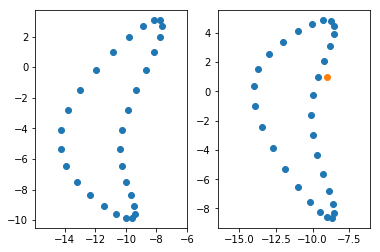

In [5]:
trans_global.fill_controls(torch.tensor([-15.,0.]))
rot.fill_controls(torch.tensor([10.]))
rot_center = torch.tensor([-9.,1.], requires_grad=True).view(-1)
rot.manifold.fill_gd(rot_center)
mod = dm.deformationmodules.CompoundModule([rot])
v = mod.field_generator()(X)
target = source + v

plt.subplot(1,2,2)
plt.scatter(target.detach()[:,0], target.detach()[:,1])
plt.scatter(rot_center.detach()[0], rot_center.detach()[1])
plt.axis('equal')
plt.show()

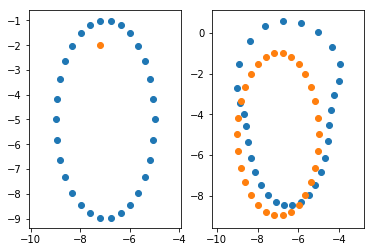

In [75]:
trans_global = dm.deformationmodules.GlobalTranslation(manifold1, 50)
trans_global.fill_controls(torch.tensor([-7.,-5.]))

mod = dm.deformationmodules.CompoundModule([trans_global])
v = mod.field_generator()(Y)
source2 = Y + v

scal_center = torch.tensor([-7.2,-2.])
scal.fill_controls(torch.tensor([4.], requires_grad=True))
scal.manifold.fill_gd(scal_center)
trans_global.fill_controls(torch.tensor([0.5, 0.5]))
mod = dm.deformationmodules.CompoundModule([scal, trans_global])
v = mod.field_generator()(source2)
target2 = source2 + v

plt.figure()
plt.subplot(1,2,1)
plt.scatter(source2.detach()[:,0], source2.detach()[:,1])
plt.scatter(scal_center.detach()[0], scal_center.detach()[1])
plt.axis('equal')

plt.subplot(1,2,2)
plt.scatter(target2.detach()[:,0], target2.detach()[:,1])
plt.scatter(source2.detach()[:,0], source2.detach()[:,1])
plt.axis('equal')
plt.show()

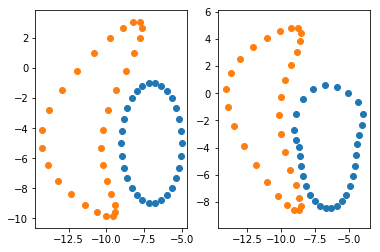

In [76]:
plt.figure()
plt.subplot(1,2,1)
plt.scatter(source2.detach()[:,0], source2.detach()[:,1])
plt.scatter(source.detach()[:,0], source.detach()[:,1])
plt.axis('equal')

plt.subplot(1,2,2)
plt.scatter(target2.detach()[:,0], target2.detach()[:,1])
plt.scatter(target.detach()[:,0], target.detach()[:,1])
plt.axis('equal')
plt.show()